[项目要求 Investigate a Dataset](https://review.udacity.com/#!/rubrics/306/view)  
[项目数据 Titanic](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584bcec3_titanic-data/titanic-data.csv)  

<p style="color:#888888">
作业环境：  
Jupyter notebook server: 4.3.1  
Python 2.7.13 |Anaconda custom (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]  
</p>

[Github](https://github.com/xnceth/DA-P2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 第一步 - 选择数据集
>从下面的数据集中任选一个，在此项目中进行分析：

>泰坦尼克号数据：包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。你可以在 Kaggle 网站上查看这个数据集的详细描述。这个数据集就是来自 Kaggle。
>棒球赛数据：这个数据集包括从 1871 年到 2014年完整的棒球赛击球和投球数据，还包括防守数据、排名、球队数据、管理记录、季后赛数据等等。这个数据集含有很多文件，你可以任选一个你最感兴趣的展开分析。选择“逗号分开”的文件版本（comma-delimited version），其中有 CSV 格式文档。

我将选择泰坦尼克号的数据进行探索。

In [2]:
df = pd.read_csv('titanic-data.csv')

# Check if the columns contain empty values.
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

清理缺失值：  
1. 因主要的探索项是"Survived"，所以对缺失这一关键信息的记录作删除 dropna()。(数据中survived并没有空置，这里只做补充。）
2. 对Cabin, Embarked为空的作补零 fillna(0)。
3. 对Age用其平均值来补缺fillna(Age.mean())。

In [3]:
# 1.
df.dropna(subset=['Survived'], inplace=True)

# 2.
for col in ['Cabin', 'Embarked']:
    df[col].fillna(0, inplace=True)

# 3.
df['Age'].fillna(df.Age.mean(), inplace=True)

print 'If any datapoint is empty?: ', df.isnull().any().any()

If any datapoint is empty?:  False


VARIABLE DESCRIPTIONS:  

>survival        Survival
                (0 = No; 1 = Yes)  
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)  
name            Name  
sex             Sex  
age             Age  
sibsp           Number of Siblings/Spouses Aboard  
parch           Number of Parents/Children Aboard  
ticket          Ticket Number  
fare            Passenger Fare  
cabin           Cabin  
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)  

>SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

>Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

>With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

>Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

>Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

### 第二步 - 做好准备
>最终，你需要提交一份报告（并与你的朋友、家人或同事分享）。在正式开始之前，让我们为此做好准备。我们建议你新建一个文件夹，包括：

>报告文档，用来传达你的发现
你用来分析数据的任何 Python 代码
你分析的数据集（当然，提交的时候你不需要包括它）
你可以使用 IPython Notebook，这样，你可以在同一份文件里编写报告和提交代码。不然你可能只能分别提交报告和代码了。

所有的分析及代码都将保存在这个文件：
[titanic_data_explore.ipynb](https://github.com/xnceth/DA-P2/blob/master/titanic_data_explore.ipynb)

### 第三步 - 分析数据
>思考你可以用数据集回答哪些问题，然后开始着手调查。下面是一些示例：

>泰坦尼克号数据
有哪些因素会让船上的人生还率更高？
棒球赛数据
不同表现指标之间有何关系？有哪些指标之间程有明显的正相关或负相关？
薪酬最高的棒球球员有何特点？
试着提出那些调查多个变量之间的关系的问题。你应该在你的调查里分析至少一个因变量和三个自变量。在恰当的地方使用 NumPy 和 Pandas。

#### 问题一：样本的生还率为多少？

生还人数： 342
总人数： 891
生还率： 38.3838383838 %


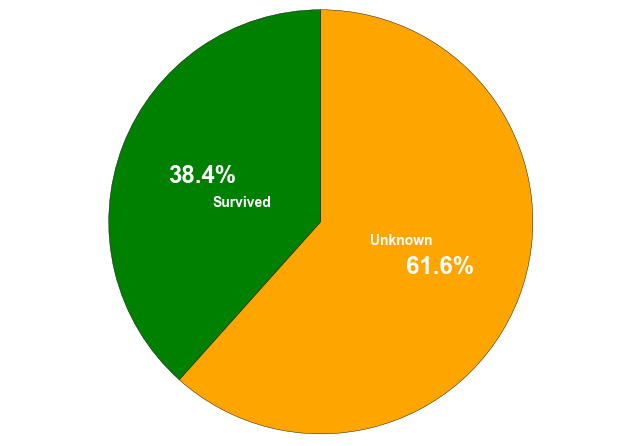

In [4]:
print '生还人数：', df.Survived.sum() 
print '总人数：', len(df)
print '生还率：', df.Survived.mean() * 100, '%'

a = len(df[df.Survived==1])
b = len(df[df.Survived==0])

plt.pie([a,b], 
        labels=['Survived', 'Unknown'],
        labeldistance=0.25,
        colors=['green', 'orange'],
        autopct='%1.1f%%',
        startangle=90,
        textprops={'weight': 'bold', 'color': 'white', 'fontsize':'x-large'})
plt.axis('equal')
plt.show()

#### 问题二：男女的生还比例各为多少？

In [5]:
male = df[df.Sex=='male']
female = df[df.Sex=='female']
print '男性生还率：', male.Survived.sum() / float(len(male)) * 100, '%'
print '女性生还率：', female.Survived.sum() / float(len(female)) * 100, '%'

男性生还率： 18.8908145581 %
女性生还率： 74.2038216561 %


#### 问题三：生还率与那些因素相关？
探索各列与“Survived"的相关系数(皮尔逊系数)：
$$r={\frac {1}{n-1}}\sum \limits _{i=1}^{n}\left({\frac {X_{i}-{\overline {X}}}{\sigma _{X}}}\right)\left({\frac {Y_{i}-{\overline {Y}}}{\sigma _{Y}}}\right)$$


<i>* 此公式针对两样本的相关系数，即ddof=1。在这里，我希望对于总体样本进行估算，所以采用ddof=0求值。</i>  
<i>* 此函数为数学公式的直接实现，也可调用numpy包的函数corrcoef(a,b)</i>

In [6]:
# @see numpy.corrcoef(x,y)
# ddof = 0 for population estimation
def myCorr(x, y):
    n = len(x)
    if n != len(y):
        print "warn: different length"
    
    return (((x-x.mean())/x.std(ddof=0)) * ((y-y.mean())/y.std(ddof=0))).sum() / n

# correlation with numeric columns
for x in ['PassengerId','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    print x, ' - Survived:\t', myCorr(df[x], df['Survived']) 

PassengerId  - Survived:	-0.00500666076707
Pclass  - Survived:	-0.338481035961
Age  - Survived:	-0.0698085152871
SibSp  - Survived:	-0.0353224988857
Parch  - Survived:	0.0816294070835
Fare  - Survived:	0.257306522385


从结果可以看出Pclass与生还与否之间可能有某种联系，进一步分析：

In [7]:
byPclass = df.groupby('Pclass')
byPclass.first()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C
3,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S


Survive-chance of each 'Pclass' in percentage %:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


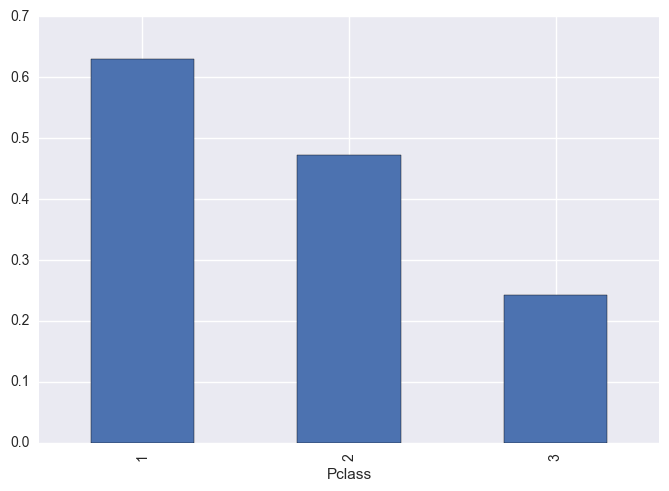

In [8]:
meanByPclass = byPclass.Survived.mean()
print "Survive-chance of each 'Pclass' in percentage %:\n", meanByPclass
meanByPclass.plot(kind='bar')
plt.show()

从图中可以看出，舱位越高（1)，生还几率越高(63%)。反之，舱位越低（3），生还几率相对越低(24%)。

接着，尝试针对非numeric的列进行探索，首先是性别, 此处将male转换为‘0’, female转换为‘1’

In [9]:
def digitalSex(s):
    if s == "male":
        return int(0) # actually in python, True == 1, False == 0.
    elif s == "female":
        return int(1)
    else:
        return None
    
dSex = df.Sex.apply(digitalSex)
print 'Pearson correlation coef. (Survived, Sex): ', myCorr(df.Survived, dSex)

Pearson correlation coef. (Survived, Sex):  0.543351380658


可以得出“性别对生还几率也有一定相关性(.54)”。接着，对船舱及性别进行分组：

In [10]:
bySexPclass = df.groupby(('Pclass', 'Sex'))
bySexPclass.first()

PassengerId  Survived  \
Pclass Sex                             
1      female            2         1   
       male              7         0   
2      female           10         1   
       male             18         1   
3      female            3         1   
       male              1         0   

                                                            Name        Age  \
Pclass Sex                                                                    
1      female  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.000000   
       male                              McCarthy, Mr. Timothy J  54.000000   
2      female                Nasser, Mrs. Nicholas (Adele Achem)  14.000000   
       male                         Williams, Mr. Charles Eugene  29.699118   
3      female                             Heikkinen, Miss. Laina  26.000000   
       male                              Braund, Mr. Owen Harris  22.000000   

               SibSp  Parch            Ticket     Fare Cabin Embarked  
Pclass Sex                                                             
1      female      1      0          PC 17599  71.2833   C85        C  
       male        0      0             17463  51.8625   E46        S  
2      female      1      0            237736  30.0708     0        C  
       male        0      0            244373  13.0000     0        S  
3      female      0      0  STON/O2. 3101282   7.9250     0        S  
       male        1      0         A/5 21171   7.2500     0        S

每组的生还率为：

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


D:\prog\Anaconda\lib\site-packages\pandas\tools\plotting.py:983: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


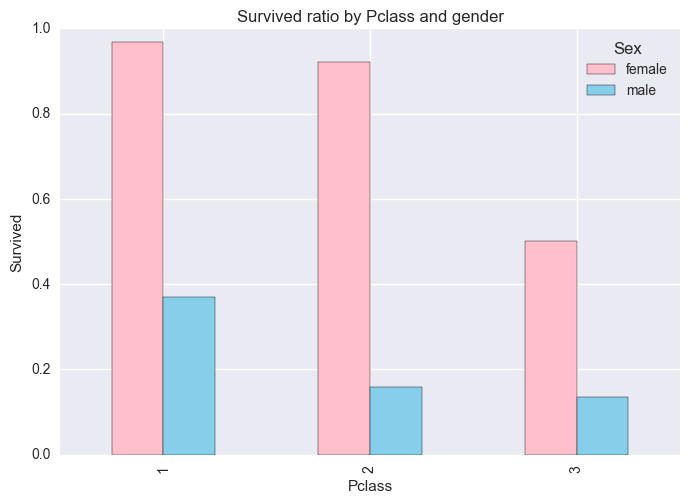

In [11]:
ratio = bySexPclass.Survived.mean()
print ratio
ratio.unstack().plot(kind='bar', colors=['pink', 'skyblue'])
plt.title('Survived ratio by Pclass and gender')
plt.ylabel('Survived')
plt.show()

可以看到头等舱及二等舱的女性几乎都能生还，而3等舱的男性则很难生还。下图为不同船舱中男女存活的比例示意图：

#### 问题四：不同年龄段的生存率是否有明显不同？
虽然从之前的分析[6]中看不出年龄与生还率的直接联系，但不同年龄段的人可能会不同：

In [12]:
df.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

由于平均年龄为30岁，一个标准差为13岁，年龄最大差值为（80-0）= 80岁，试着将年龄按每10岁来分组（binsize=10, 8 bins）：

In [13]:
import math
df2 = df.loc[:,['Age', 'Survived']].dropna()
binsize = 10
df2['Age10'] = df2.Age.apply(lambda n: math.floor(n/binsize)*binsize)
print df2.head()

    Age  Survived  Age10
0  22.0         0   20.0
1  38.0         1   30.0
2  26.0         1   20.0
3  35.0         1   30.0
4  35.0         0   30.0


按照每10岁来分组：

In [14]:
byAge10 = df2.groupby(['Age10'])
percentage = byAge10.Survived.sum().div(byAge10.size())
print '\nSurvival ratio in percentage %:\n', percentage * 100


Survival ratio in percentage %:
Age10
0.0      61.290323
10.0     40.196078
20.0     32.493703
30.0     43.712575
40.0     38.202247
50.0     41.666667
60.0     31.578947
70.0      0.000000
80.0    100.000000
dtype: float64


可以看出，相对而言孩童（&lt;10岁）的生存率较高（可以想象，小孩可以抱在手上，且不占救生船的位置）。下图是存活人群中不同年龄段的分布示意图：

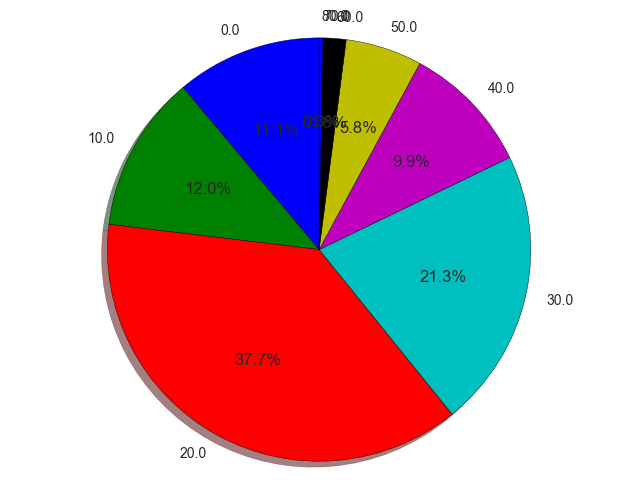

In [15]:
agelb = byAge10.groups.keys()
plt.pie(byAge10.Survived.sum(), labels=sorted(agelb), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

从图总可以看出存活下来的人大多（70%）都为30岁以下。<a id="refnote1" href="#note1" style="text-decoration: none">【1】</a>

#### 问题五：生还率是否与姓名有联系，是否某个家族得到优先的救援？<a id="refnote2" href="#note2" style="text-decoration: none">【2】</a>

In [16]:
lastname = df.Name.apply(lambda s: s.split(",")[1])
byLastname = df.groupby(lastname)
byLastname.Survived.sum().max()
byLastname.Survived.sum().sort_values(ascending=False).head()

Name
 Miss. Bertha            4
 Miss. Anna Sofia        3
 Miss. Anna              3
 Miss. Mary              3
 Miss. Ellen "Nellie"    2
Name: Survived, dtype: int64

好像并没有什么特别，排名靠前的都是女性，而根据之前的分析，女性获救的比例本来就比较高。



### 第四步 - 分享发现
>分析完数据以后，编写一份报告，分享你觉得最有意思的发现。我们建议你使用 IPython Notebook，这样你可以在同一份文件里包括你的报告和代码。当然你也可以使用其他你习惯的工具。

通过以上对Titanic部分生还数据的分析，发现：  
* <b>头等舱及二等舱的女性几乎都能生还，而3等舱的男性则很难生还。</b>
* <b>孩童得到了优先的救援。</b>
* <b>获救的人中绝大多数的年龄都小于30岁。</b>
* <b>“Bertha” 与 “Anna” 也许会是个幸运的女孩名字。</b>

### 第五步 - 检查
>使用这个项目评估准则来检查你的项目。如果你已达到所有要求，可以继续提交你的项目。如果你发现还有改进的空间，不要迟疑，这就去做吧。

<ol>
<li id="note1">由于在清理数据时，用了年龄的平均值30来填充空值，可能会导致30岁年龄段的统计结果与真实情况有偏差。<a href="#refnote1" style="text-decoration: none">#</a></li>
<li id="note2">这里只简单的以相同的姓氏（lastname）判断是否为同一个家族。<a href="#refnote2" style="text-decoration: none">#</a></li>
</ol>